In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_data = pd.read_csv('movies_data_final.csv')

In [3]:
movies_data.info(), movies_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9082 entries, 0 to 9081
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                9082 non-null   int64  
 1   imdbId                 9082 non-null   int64  
 2   tmdbId                 9082 non-null   float64
 3   cast                   8992 non-null   object 
 4   crew                   9082 non-null   object 
 5   director               9058 non-null   object 
 6   keywords               8321 non-null   object 
 7   adult                  9082 non-null   bool   
 8   belongs_to_collection  1672 non-null   object 
 9   budget                 9082 non-null   int64  
 10  genres                 9047 non-null   object 
 11  homepage               1971 non-null   object 
 12  imdb_id                9082 non-null   object 
 13  original_language      9082 non-null   object 
 14  original_title         9082 non-null   object 
 15  over

(None,
 Index(['movieId', 'imdbId', 'tmdbId', 'cast', 'crew', 'director', 'keywords',
        'adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
        'imdb_id', 'original_language', 'original_title', 'overview',
        'popularity', 'poster_path', 'production_companies',
        'production_countries', 'release_date', 'revenue', 'runtime',
        'spoken_languages', 'status', 'tagline', 'title', 'video',
        'vote_average', 'vote_count', 'year'],
       dtype='object'))

(array([ 44.,  52.,  73.,  72.,  83.,  80.,  86.,  91.,  81., 191.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

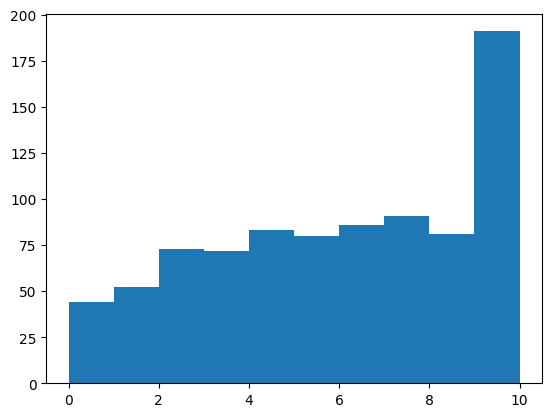

In [4]:
# histogram of the number of ratings per movie
plt.hist(movies_data['vote_count'], range=(0, 10))

In [5]:
# make a new dataframe with only the movies titles and the vote counts
col = ['movieId','title', 'adult', 'genres',  'vote_average', 'vote_count', 'year', 'popularity']
movies_data_modified = movies_data[col] 

In [6]:
movies_data_modified.head()

,movieId,title,adult,genres,vote_average,vote_count,year,popularity
0,1,Toy Story,False,Animation|Comedy|Family,7.7,5415.0,1995,21.946943
1,2,Jumanji,False,Adventure|Fantasy|Family,6.9,2413.0,1995,17.015539
2,3,Grumpier Old Men,False,Romance|Comedy,6.5,92.0,1995,11.712900
3,4,Waiting to Exhale,False,Comedy|Drama|Romance,6.1,34.0,1995,3.859495
4,5,Father of the Bride Part II,False,Comedy,5.7,173.0,1995,8.387519


The weighted rating formula used by IMDB to produce top  is: [Reference](http://trailerpark.weebly.com/imdb-rating.html?source=post_page) 

$$\text{WR} = \frac{v}{v + m} \cdot R + \frac{m}{v + m} \cdot C$$

Where:
- `R` is the average for the movie (mean rating).
- `v` is the number of votes for the movie.
- `m` is the minimum votes required to be listed in the Top 50 (currently 1000).
- `C` is the mean vote across the whole report (currently 6.8).

In [7]:
m = movies_data_modified['vote_count'].quantile(0.75)
C = movies_data_modified['vote_average'].mean()
movies_data_modified['weighted_average']  =  ((movies_data_modified['vote_count']  * movies_data_modified['vote_average']) + (m * C)) / (movies_data_modified['vote_count'] + m)

C:\Users\chira\AppData\Local\Temp\ipykernel_18252\2502843361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_modified['weighted_average']  =  ((movies_data_modified['vote_count']  * movies_data_modified['vote_average']) + (m * C)) / (movies_data_modified['vote_count'] + m)


In [8]:
movies_data_modified.head()

,movieId,title,adult,genres,vote_average,vote_count,year,popularity,weighted_average
0,1,Toy Story,False,Animation|Comedy|Family,7.7,5415.0,1995,21.946943,7.615356
1,2,Jumanji,False,Adventure|Fantasy|Family,6.9,2413.0,1995,17.015539,6.829210
2,3,Grumpier Old Men,False,Romance|Comedy,6.5,92.0,1995,11.712900,6.389878
3,4,Waiting to Exhale,False,Comedy|Drama|Romance,6.1,34.0,1995,3.859495,6.339879
4,5,Father of the Bride Part II,False,Comedy,5.7,173.0,1995,8.387519,6.149544


In [9]:
movies_data_modified = movies_data_modified.sort_values('weighted_average', ascending=False)

In [10]:
movies_data_modified.head(10)

,movieId,title,adult,genres,vote_average,vote_count,year,popularity,weighted_average
284,318,The Shawshank Redemption,False,Drama|Crime,8.5,8358.0,1994,51.645403,8.410370
692,858,The Godfather,False,Drama|Crime,8.5,6024.0,1972,41.109264,8.377631
6896,58559,The Dark Knight,False,Drama|Action|Crime|Thriller,8.3,12269.0,2008,123.167259,8.243904
2369,2959,Fight Club,False,Drama,8.3,9678.0,1999,63.869599,8.229433
266,296,Pulp Fiction,False,Thriller|Crime,8.3,8670.0,1994,140.950236,8.221561
472,527,Schindler's List,False,Drama|History|War,8.3,4436.0,1993,41.725123,8.152396
8585,112552,Whiplash,False,Drama,8.3,4376.0,2014,64.299990,8.150528
4222,5618,Spirited Away,False,Fantasy|Adventure|Animation|Family,8.3,3968.0,2001,41.048867,8.136456
1835,2324,Life Is Beautiful,False,Comedy|Drama,8.3,3643.0,1997,39.394970,8.123197
321,356,Forrest Gump,False,Comedy|Drama|Romance,8.2,8147.0,1994,48.307194,8.121038


In [11]:
movies_data_modified['popularity'].head(10)

284      51.645403
692      41.109264
6896    123.167259
2369     63.869599
266     140.950236
472      41.725123
8585     64.299990
4222     41.048867
1835     39.394970
321      48.307194
Name: popularity, dtype: float64

In [12]:
# normalize the popularity to be between 0 and 1
movies_data_modified['popularity'].describe()

count    9082.000000
mean        7.268905
std         9.372314
min         0.000004
25%         2.954521
50%         6.418871
75%         9.861742
max       547.488298
Name: popularity, dtype: float64

normalizing the popularity as max is 547 so decision will be made on the basis of popularity

In [13]:
from sklearn import preprocessing
preprocessing.normalize(movies_data_modified['popularity'].values.reshape(1, -1))

array([[0.04569239, 0.03637072, 0.10897014, ..., 0.01525853, 0.01507481,
        0.00785316]])

In [14]:
movies_data_modified['popularity'] = preprocessing.normalize(movies_data_modified['popularity'].values.reshape(1, -1)).reshape(-1, 1)
movies_data_modified['popularity'] = movies_data_modified['popularity'] * 10

In [15]:
movies_data_modified.head()

,movieId,title,adult,genres,vote_average,vote_count,year,popularity,weighted_average
284,318,The Shawshank Redemption,False,Drama|Crime,8.5,8358.0,1994,0.456924,8.410370
692,858,The Godfather,False,Drama|Crime,8.5,6024.0,1972,0.363707,8.377631
6896,58559,The Dark Knight,False,Drama|Action|Crime|Thriller,8.3,12269.0,2008,1.089701,8.243904
2369,2959,Fight Club,False,Drama,8.3,9678.0,1999,0.565075,8.229433
266,296,Pulp Fiction,False,Thriller|Crime,8.3,8670.0,1994,1.247033,8.221561


In [16]:
movies_data_modified['score'] = movies_data_modified['weighted_average'] * 0.5 + movies_data_modified['popularity'] * 0.5

In [17]:
movies_data_modified = movies_data_modified.sort_values('score', ascending=False)

In [18]:
movies_data_modified.head(10)

,movieId,title,adult,genres,vote_average,vote_count,year,popularity,weighted_average,score
8889,135887,Minions,False,Family|Animation|Adventure|Comedy,6.4,4729.0,2015,4.843810,6.397285,5.620547
8664,115617,Big Hero 6,False,Adventure|Family|Animation|Action|Comedy,7.8,6289.0,2014,1.892001,7.720976,4.806489
266,296,Pulp Fiction,False,Thriller|Crime,8.3,8670.0,1994,1.247033,8.221561,4.734297
6896,58559,The Dark Knight,False,Drama|Action|Crime|Thriller,8.3,12269.0,2008,1.089701,8.243904,4.666803
8586,112556,Gone Girl,False,Mystery|Thriller|Drama,7.9,6023.0,2014,1.369576,7.811961,4.590768
8752,122904,Deadpool,False,Action|Adventure|Comedy,7.4,11444.0,2016,1.662064,7.367858,4.514961
284,318,The Shawshank Redemption,False,Drama|Crime,8.5,8358.0,1994,0.456924,8.410370,4.433647
7389,72998,Avatar,False,Action|Adventure|Fantasy|Science Fiction,7.2,12114.0,2009,1.637383,7.175446,4.406414
2369,2959,Fight Club,False,Drama,8.3,9678.0,1999,0.565075,8.229433,4.397254
692,858,The Godfather,False,Drama|Crime,8.5,6024.0,1972,0.363707,8.377631,4.370669
